### Recursion
- a loop that calls itself repeatedly until a base case is reached
- vs iterative solution:
    - Iterative: Uses a loop to repeatedly execute a block of code until a condition is met.
    - Recursive: Breaks down a problem into smaller subproblems and solves them recursively.

    - recursion can be more efficient, especially when dealing with problems that are naturally recursive, such as tree and graph traversals,
    - but less efficient than iteration in other cases
        - recursion requires performance overhead due to function call overhead and stack usage
        - iterative solutions can avoid the function call overhead by directly manipulating variables within a loop.


#### Key Elements of Recursion:
1) Base Case: 
    - The simplest case that can be solved directly, without making further recursive calls.
    - In the base case, there is no recursive function call.
2) Recursive Case:
    - The case where the problem is broken down into smaller subproblems, and the function calls itself to solve these subproblems.


#### The Fruit Sandwich Line Analogy
- Imagine a long line of people waiting for a fruit sandwich. To find out how many people are in line, you can use a recursive approach:

- Base Case: If you're the first person in line, there's no one ahead of you, so you return 0.
- Recursive Case: If you're not the first person, you ask the person in front of you how many people are ahead of them. You then add 1 to their answer to account for yourself.
- This process continues until the first person in line is reached, and the result is propagated back through the line.



#### How Recursion Works:
1. Function Call Stack: Each function call is pushed onto a stack.
2. Base Case Reached: When the base case is reached, the function returns without making further recursive calls.
3. Backtracking: The function returns from each recursive call, working its way back up the stack.


#### Key Points:
- Recursion can be elegant for solving certain problems, but it can also be less efficient than iterative solutions due to function call overhead.
- It's crucial to have a well-defined base case to prevent infinite recursion.
- The recursive case should bring the problem closer to the base case.


#### Recursion outline

![Screenshot 2024-10-30 at 3.16.41 AM.png](<attachment:Screenshot 2024-10-30 at 3.16.41 AM.png>)



#### Execution context
- contains the variables within each recursive function call:
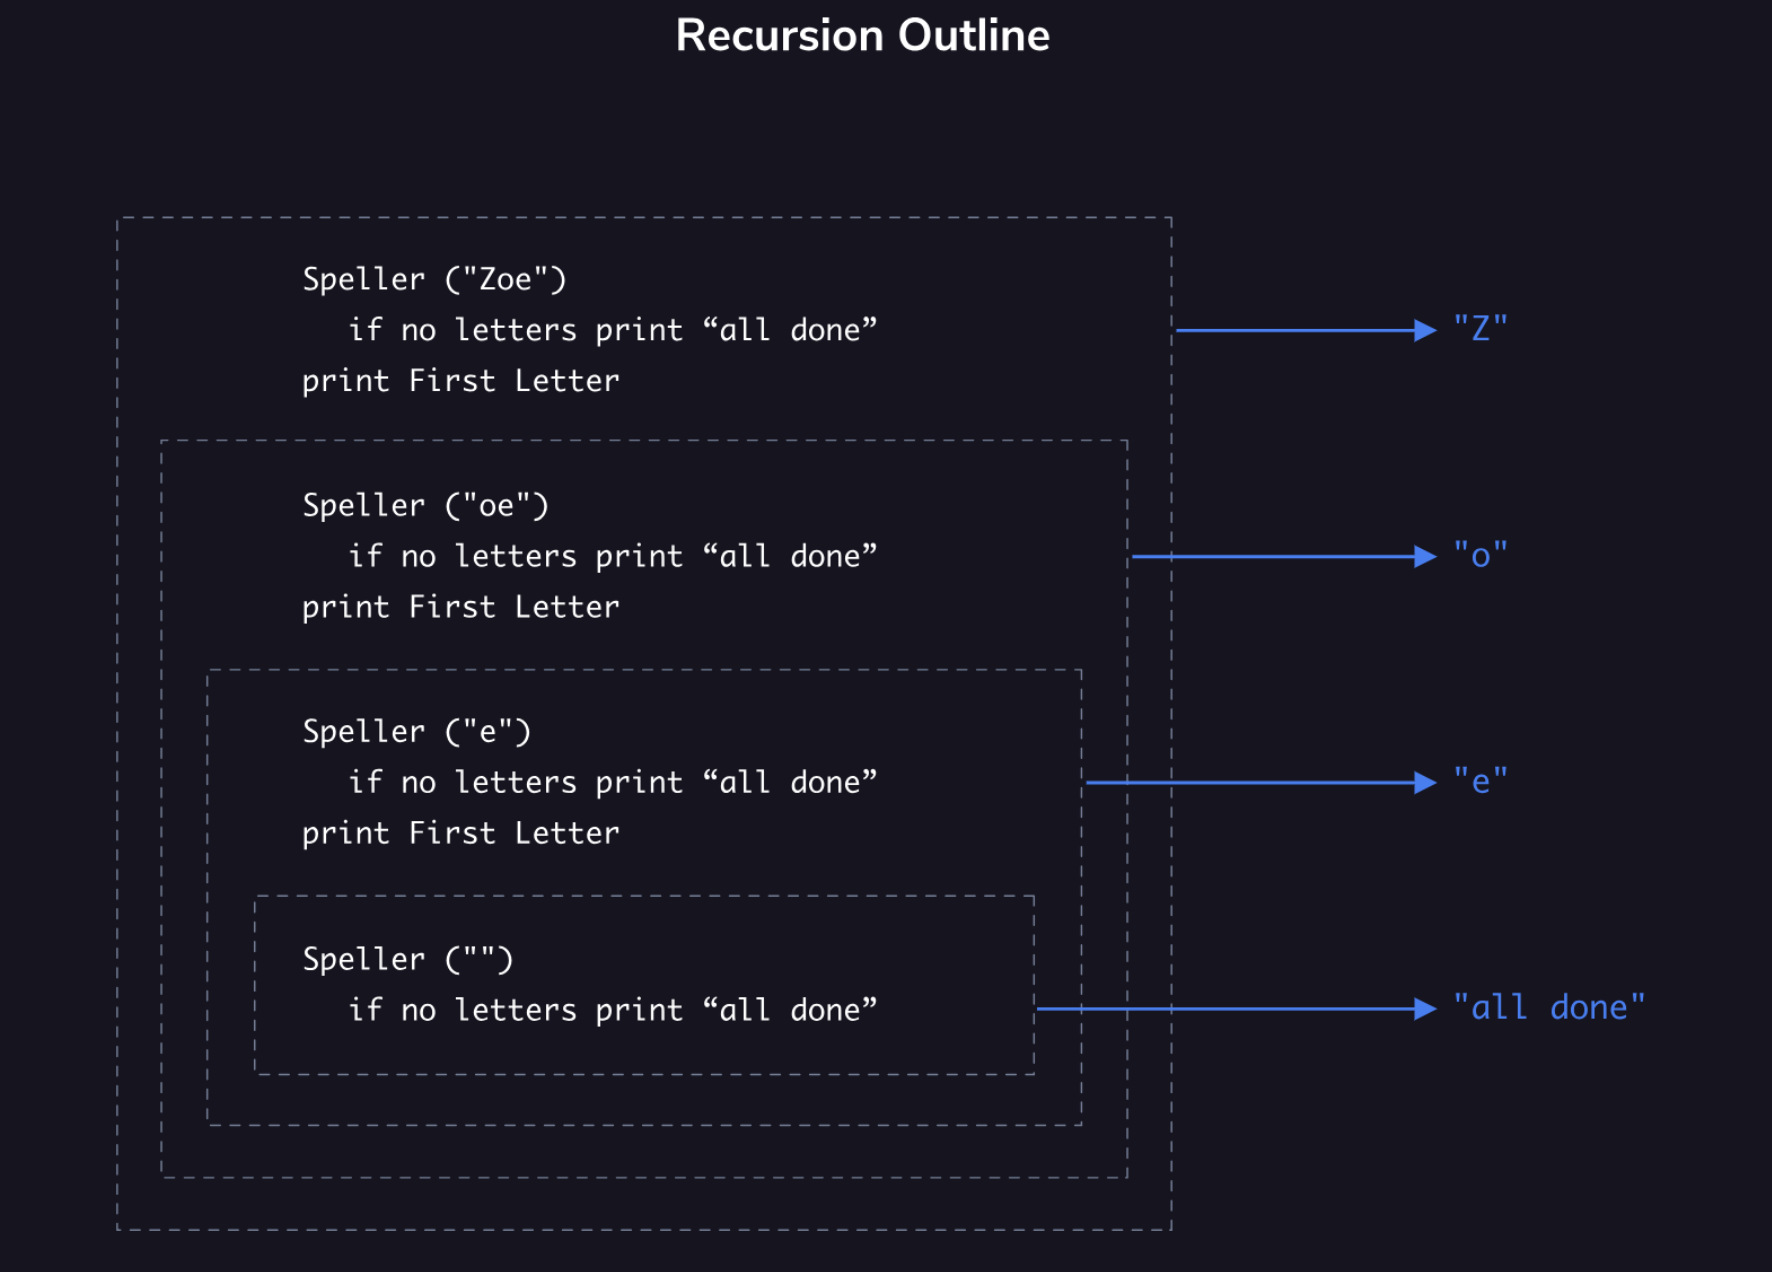

In [23]:
# quick example of recursion

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

In [24]:
def sum_to_one(n):
  result = 1
  call_stack = []
  
  while n != 1:
    execution_context = { "n_value": n }
    call_stack.append(execution_context)
    n -= 1
    print(call_stack)
  
  print("BASE CASE REACHED")
  
  # begin returning values as the function calls are “popped” off the call stack.
  while len(call_stack) != 0:
    return_value = call_stack.pop()
    print("Return value of {0} adding to result {1}".format(return_value['n_value'], result))
    result += return_value['n_value']
  return result, call_stack

sum_to_one(4)

[{'n_value': 4}]
[{'n_value': 4}, {'n_value': 3}]
[{'n_value': 4}, {'n_value': 3}, {'n_value': 2}]
BASE CASE REACHED
Return value of 2 adding to result 1
Return value of 3 adding to result 3
Return value of 4 adding to result 6


(10, [])

In [25]:
def sum_to_one(n):
  if n == 1:
    return n
  print("Recursing with input: {0}".format(n))
  return n + sum_to_one(n - 1)

print(sum_to_one(7))

Recursing with input: 7
Recursing with input: 6
Recursing with input: 5
Recursing with input: 4
Recursing with input: 3
Recursing with input: 2
28


#### Recursive Factorial Function and Big O complexity (O(n)) Analysis

- factorial function (n!) is the product of all positive integers from 1 up to n.

i.e., 4! = 4 * 3 * 2 * 1 = 24.


- The Recursive Approach
1) Base Case: If the input is less than 2 (i.e., 0 or 1), return 1 (factorial of 0 and 1 is 1).
2) Recursive Case: Otherwise, return the input multiplied by the factorial of the input minus 1. This step breaks the problem into a smaller subproblem (factorial of n-1) and calls itself recursively.


#### Big O Analysis of Recursive Factorial

- Big O notation measures the efficiency of algorithms in terms of their growth rate with increasing input size.

1) Recursive calls: With each increase in input, one additional recursive call is made.
2) Dominant factor: The number of recursive calls is directly proportional to the input size.
3) Time complexity: Therefore, the time complexity of the recursive factorial function is O(n), which signifies linear growth

* note that recursion can have additional overhead compared to iterative solutions (using loops).

In [26]:
def factorial(n):
  if n <= 1:
    return 1
  else:
    return n * factorial(n - 1)

print(factorial(12))

479001600


#### Compare recursive and iterative solutions to generate power set
- Stack Overflow: Excessive recursion can lead to a stack overflow error, as each function call consumes stack memory.
- Efficiency: Recursive functions often have a higher time and space complexity compared to iterative solutions due to function call overhead.
- Elegance: Recursion can provide concise and elegant solutions to problems that are naturally recursive.

In [27]:
def power_set(my_list):
    # base case: an empty list
    if len(my_list) == 0:
        return [[]]
    
    # recursive step: subsets without first element
    power_set_without_first = power_set(my_list[1:])

    # subsets with first element
    with_first = [ [my_list[0]] + rest for rest in power_set_without_first ]

    return with_first + power_set_without_first
  
universities = ['MIT', 'UCLA', 'Stanford', 'NYU']
power_set_of_universities = power_set(universities)

for set in power_set_of_universities:
  print(set)

['MIT', 'UCLA', 'Stanford', 'NYU']
['MIT', 'UCLA', 'Stanford']
['MIT', 'UCLA', 'NYU']
['MIT', 'UCLA']
['MIT', 'Stanford', 'NYU']
['MIT', 'Stanford']
['MIT', 'NYU']
['MIT']
['UCLA', 'Stanford', 'NYU']
['UCLA', 'Stanford']
['UCLA', 'NYU']
['UCLA']
['Stanford', 'NYU']
['Stanford']
['NYU']
[]


In [28]:
def flatten(my_list):
  """
  Make a flat list
  """
  result = []
  for item in my_list:

    # 1) set up recursive step
    if isinstance(item, list):
      flat_list = flatten(item)
      result += flat_list

    # 2) set up base case
    else:
      result.append(item)

  return result


planets = ['mercury', 'venus', ['earth'], 'mars', [['jupiter', 'saturn']], 'uranus', ['neptune', 'pluto']]
print(flatten(planets))

['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']


In [29]:
def fibonacci(n):
  """
  Make fibonacci (sum the second to last and last item)
  """

  if n == 1 or n == 0: # base cases
    return n

  else:  # recursive step
    print("Recursive call with {0} as input".format(n))
    return fibonacci(n - 1) + fibonacci(n - 2)


fibonacci(5)
fibonacci_runtime = "2^N"

Recursive call with 5 as input
Recursive call with 4 as input
Recursive call with 3 as input
Recursive call with 2 as input
Recursive call with 2 as input
Recursive call with 3 as input
Recursive call with 2 as input


In [30]:
def build_binary_search_tree(my_list):
  """
  Build a binary search trees:
    1) Reference two children at most per tree node.
    2) The “left” child of the tree must contain a value lesser than its parent
    3) The “right” child of the tree must contain a value greater than its parent.
  """
  
  if len(my_list) == 0:
    return "No tree"

  middle_idx = len(my_list) // 2
  middle_value = my_list[middle_idx]
  
  print("Middle index: {0}".format(middle_idx))
  print("Middle value: {0}".format(middle_value))
  
  tree_node = {"data": middle_value}
  tree_node["left_child"] = build_binary_search_tree(my_list[ : middle_idx])
  tree_node["right_child"] = build_binary_search_tree(my_list[middle_idx + 1 : ])

  return tree_node
  


sorted_list = [12, 13, 14, 15, 16]
binary_search_tree = build_binary_search_tree(sorted_list)
print(binary_search_tree)

runtime = "N*logN"

Middle index: 2
Middle value: 14
Middle index: 1
Middle value: 13
Middle index: 0
Middle value: 12
Middle index: 1
Middle value: 16
Middle index: 0
Middle value: 15
{'data': 14, 'left_child': {'data': 13, 'left_child': {'data': 12, 'left_child': 'No tree', 'right_child': 'No tree'}, 'right_child': 'No tree'}, 'right_child': {'data': 16, 'left_child': {'data': 15, 'left_child': 'No tree', 'right_child': 'No tree'}, 'right_child': 'No tree'}}


In [31]:
def factorial(n):  
  if n < 0:
    return ValueError("Inputs 0 or greater only")
  result = 1
  while n != 0:
    result *= n
    n -= 1
  return result

# test cases
print(factorial(3) == 6)
print(factorial(0) == 1)
print(factorial(5) == 120)

True
True
True


In [32]:
def fibonacci(n):
  if n < 0:
    ValueError("Input 0 or greater only!")

  fibs = [0, 1]
  
  if n <= len(fibs) - 1:
    return fibs[n]

  while n > len(fibs) - 1:
    fibs.append(fibs[-1] + fibs[-2])
    
  return fibs[-1]

# test cases
print(fibonacci(3) == 2)
print(fibonacci(7) == 13)
print(fibonacci(0) == 0)

True
True
True


In [33]:
def depth(tree):
  if not tree:
    return 0

  left_depth = depth(tree["left_child"])
  right_depth = depth(tree["right_child"])

  if left_depth > right_depth:
    return left_depth + 1
  else:
    return right_depth + 1

# HELPER FUNCTION TO BUILD TREES
def build_bst(my_list):
  if len(my_list) == 0:
    return None

  mid_idx = len(my_list) // 2
  mid_val = my_list[mid_idx]

  tree_node = {"data": mid_val}
  tree_node["left_child"] = build_bst(my_list[ : mid_idx])
  tree_node["right_child"] = build_bst(my_list[mid_idx + 1 : ])

  return tree_node

# HELPER VARIABLES
tree_level_1 = build_bst([1])
tree_level_2 = build_bst([1, 2, 3])
tree_level_4 = build_bst([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]) 

# test cases
print(depth(tree_level_1) == 1)
print(depth(tree_level_2) == 2)
print(depth(tree_level_4) == 4)

True
True
True
